# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

In [2]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

#etc

#your info here
__author__ = "Tan A."
__email__ = "tan.naidu@hotmail.com"

'''Questions for exploration  

1. Which features have the most influence on salary?
2. How does increase in number of miles from metro affect one's salary? 
3. Is there a direct correlation between years of experience and salary? 
4. Is there a relationship between company and salary? Do some companies pay more on average? 

'''


"Questions for exploration  \n\n1. Which features have the most influence on salary?\n2. How does increase in number of miles from metro affect one's salary? \n3. Is there a direct correlation between years of experience and salary? \n4. Is there a relationship between company and salary? Do some companies pay more on average? \n\n"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
#load the data into a Pandas dataframe

df_trainFeatures = pd.read_csv("data/train_features.csv")

df_trainSalaries = pd.read_csv("data/train_salaries.csv")



In [3]:
df_trainFeatures.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
#Join the datasets 
final_dataset = df_trainSalaries.set_index('jobId').join(df_trainFeatures.set_index('jobId'))
final_dataset.head()

,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,,
JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


### ---- 3 Clean the data ----

In [4]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [5]:
# 1. Let's check for any variables that have missing value counts of 50% or more
######################################################################################################
print(df_trainFeatures.isnull().sum())

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [6]:
print(df_trainSalaries.isnull().sum())

jobId     0
salary    0
dtype: int64


In [7]:
#2a. Check for duplicate rows
############################################################################
duplicateRowsDFFeatures = df_trainFeatures[df_trainFeatures.duplicated()]
print(duplicateRowsDFFeatures)


Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis]
Index: []


In [8]:
duplicateRowsDFSalaries = df_trainSalaries[df_trainSalaries.duplicated()]
print(duplicateRowsDFSalaries)

Empty DataFrame
Columns: [jobId, salary]
Index: []


### ---- 4 Explore the data (EDA) ----

In [11]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

#### Univariate Analysis ####

In [186]:
df_trainSalaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


** Summarizing Salary **

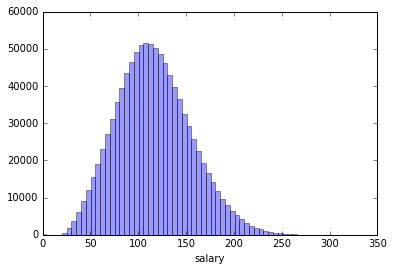

In [6]:
#Lets create a histogram.
sns.distplot(df_trainSalaries['salary'], norm_hist=False, kde=False, bins=60)
#notice slight skew

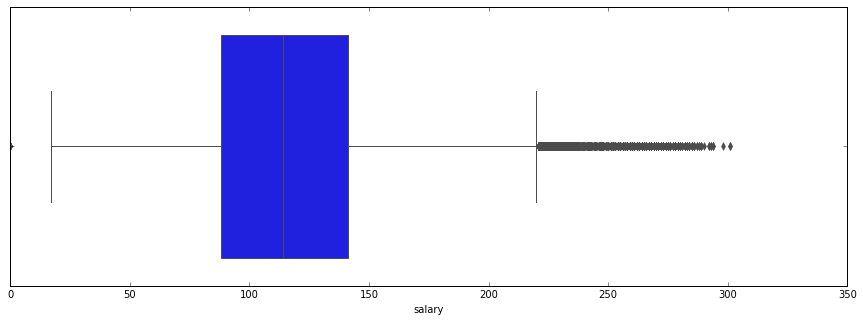

In [117]:
plt.figure(figsize=(15,5))

sns.boxplot(x=df_trainSalaries['salary'])
plt.show()


`Note: 50% of salaries lie within 88k to 141k. Large variability denoted by the range as well as a standard deviation`

** Summarizing Degree **

In [189]:
df_trainFeatures['degree'].describe()


count         1000000
unique              5
top       HIGH_SCHOOL
freq           236976
Name: degree, dtype: object

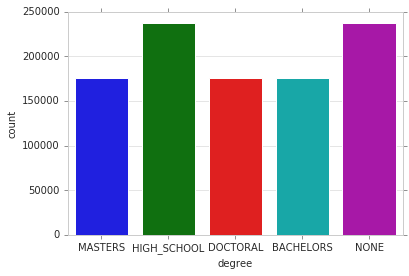

In [169]:
sns.countplot(x='degree', data=df_trainFeatures)

In [207]:
deg_freq = df_trainFeatures['degree'].value_counts(normalize=True, ascending=False)
deg_freq

HIGH_SCHOOL    0.236976
NONE           0.236854
BACHELORS      0.175495
DOCTORAL       0.175364
MASTERS        0.175311
Name: degree, dtype: float64

** Summarizing Major **

In [188]:
df_trainFeatures['major'].describe()

count     1000000
unique          9
top          NONE
freq       532355
Name: major, dtype: object

In [208]:
df_trainFeatures['major'].value_counts(normalize=True, ascending=False)

NONE           0.532355
CHEMISTRY      0.058875
LITERATURE     0.058684
ENGINEERING    0.058596
BUSINESS       0.058518
PHYSICS        0.058410
COMPSCI        0.058382
BIOLOGY        0.058379
MATH           0.057801
Name: major, dtype: float64

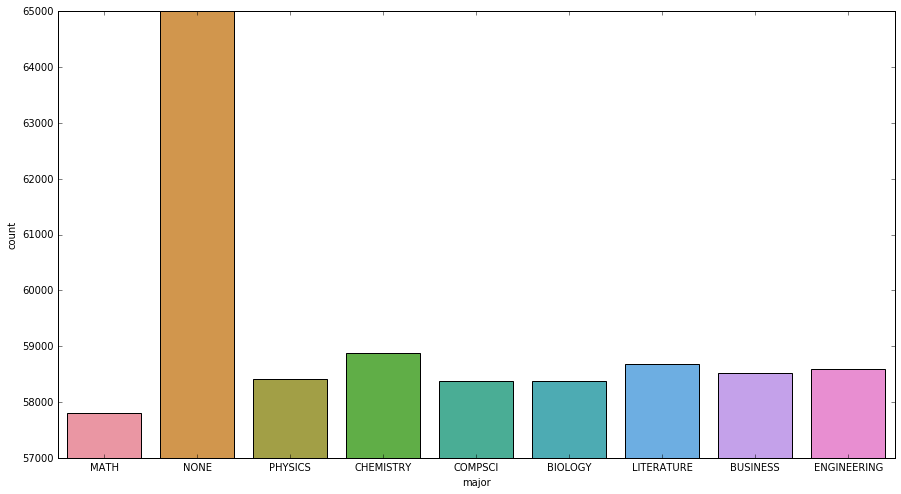

In [28]:
plt.figure(figsize=(15,8))
plt.ylim(57000,65000)

sns.countplot(x='major', data=df_trainFeatures)

plt.show()

In [29]:
#Zooming in by removing those records with major = NONE
rem_None = df_trainFeatures[df_trainFeatures.major != 'NONE']
rem_None.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31


In [209]:
rem_None['major'].value_counts(normalize=True, ascending=False)

CHEMISTRY      0.125897
LITERATURE     0.125488
ENGINEERING    0.125300
BUSINESS       0.125133
PHYSICS        0.124902
COMPSCI        0.124843
BIOLOGY        0.124836
MATH           0.123600
Name: major, dtype: float64

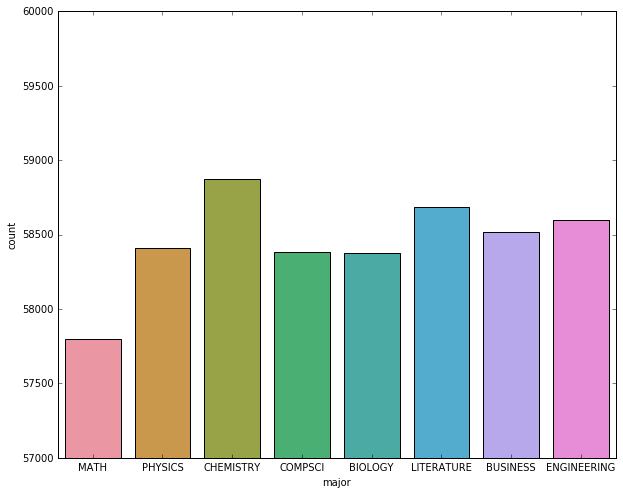

In [127]:
plt.figure(figsize=(10,8))
plt.ylim(57000,60000)

sns.countplot(x='major', data=rem_None)

plt.show()

** Summarizing Job Type **

In [192]:
df_trainFeatures['jobType'].describe()

count     1000000
unique          8
top        SENIOR
freq       125886
Name: jobType, dtype: object

In [210]:
df_trainFeatures['jobType'].value_counts(normalize=True, ascending=False)

SENIOR            0.125886
VICE_PRESIDENT    0.125235
MANAGER           0.125121
CTO               0.125046
JANITOR           0.124971
CEO               0.124778
JUNIOR            0.124594
CFO               0.124369
Name: jobType, dtype: float64

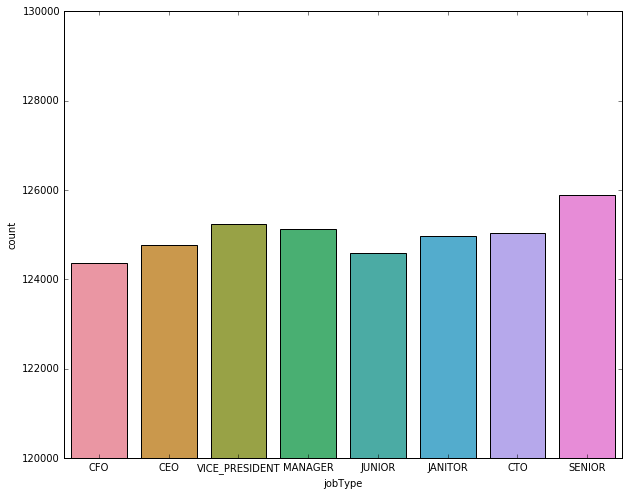

In [30]:
plt.figure(figsize=(10,8))
plt.ylim(120000,130000)

sns.countplot(x='jobType', data=df_trainFeatures)
plt.show()

** Summarizing Company ID **

In [200]:
df_trainFeatures['companyId'].describe()

count     1000000
unique         63
top        COMP39
freq        16193
Name: companyId, dtype: object

In [212]:
df_trainFeatures['companyId'].value_counts(normalize=True, ascending=False).head(5)


COMP39    0.016193
COMP35    0.016114
COMP59    0.016066
COMP30    0.016041
COMP3     0.016028
Name: companyId, dtype: float64

** Summarizing Years of Experience **

In [213]:
df_trainFeatures['yearsExperience'].describe()

count    1000000.000000
mean          11.992386
std            7.212391
min            0.000000
25%            6.000000
50%           12.000000
75%           18.000000
max           24.000000
Name: yearsExperience, dtype: float64

In [230]:
final_dataset['yearsExperience'].value_counts(bins=15)


(1.6, 3.2]       80236
(14.4, 16.0]     80185
(6.4, 8.0]       80165
(4.8, 6.4]       80108
(-0.025, 1.6]    80104
(9.6, 11.2]      79981
(17.6, 19.2]     79949
(20.8, 22.4]     79946
(22.4, 24.0]     79875
(12.8, 14.4]     79653
(8.0, 9.6]       40235
(16.0, 17.6]     40072
(3.2, 4.8]       40036
(19.2, 20.8]     39988
(11.2, 12.8]     39467
Name: yearsExperience, dtype: int64

In [225]:
final_dataset['yearsExperience'].value_counts(normalize=True, ascending = False).head(10)


15    0.040312
1     0.040265
9     0.040235
3     0.040191
22    0.040187
8     0.040118
6     0.040095
18    0.040089
17    0.040072
7     0.040047
Name: yearsExperience, dtype: float64

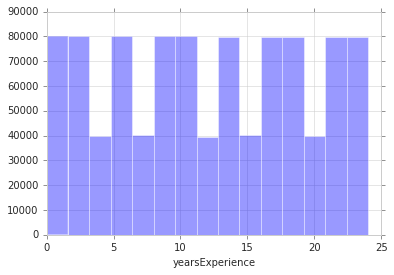

In [233]:
sns.distplot(final_dataset['yearsExperience'], kde=False, bins = 15)

`The multimodal distribution might suggest that the populations are a combination of two subpopulations. We will plot the histogram against a common categorical variable to give more insight into the data in the bivariate section`

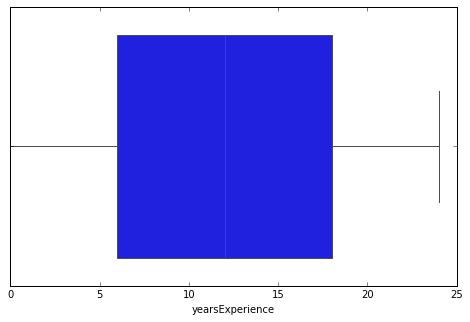

In [109]:
plt.figure(figsize=(8,5))

sns.boxplot(x=final_dataset["yearsExperience"])
plt.show()


** Summarizing Industry **

In [234]:
df_trainFeatures['industry'].value_counts(normalize=True,ascending=False) 

WEB          0.143206
AUTO         0.142943
FINANCE      0.142867
EDUCATION    0.142819
OIL          0.142771
HEALTH       0.142755
SERVICE      0.142639
Name: industry, dtype: float64

In [235]:
df_trainFeatures['industry'].describe()

count     1000000
unique          7
top           WEB
freq       143206
Name: industry, dtype: object

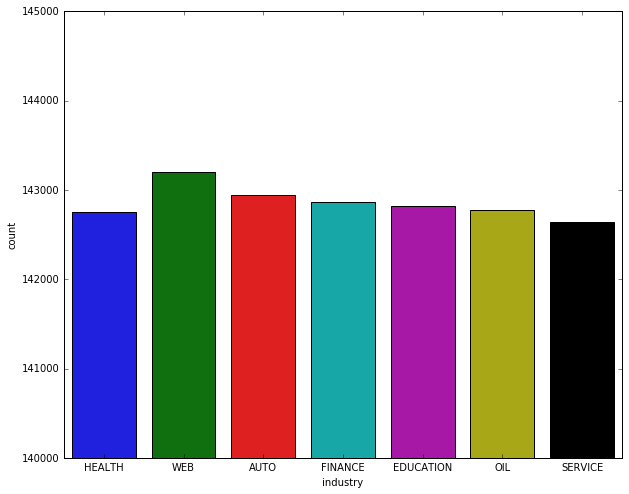

In [136]:
plt.figure(figsize=(10,8))
plt.ylim(140000,145000)

sns.countplot(x='industry', data=df_trainFeatures)
plt.show()

** Summarizing Miles from Metropolis **

In [236]:
df_trainFeatures['milesFromMetropolis'].describe()

count    1000000.000000
mean          49.529260
std           28.877733
min            0.000000
25%           25.000000
50%           50.000000
75%           75.000000
max           99.000000
Name: milesFromMetropolis, dtype: float64

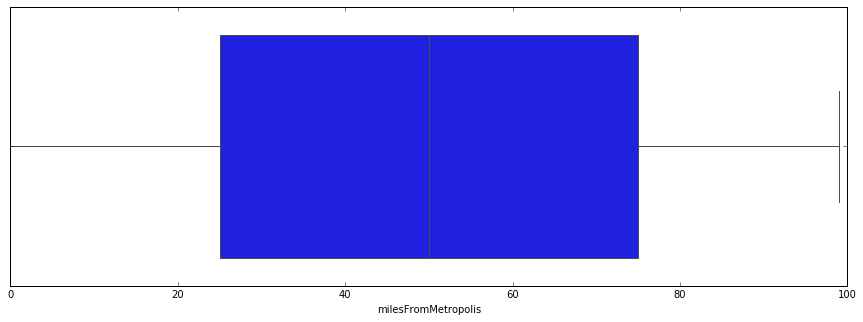

In [149]:
plt.figure(figsize=(15,5))

sns.boxplot(x=df_trainFeatures['milesFromMetropolis'])
plt.show()

In [238]:
df_trainFeatures['milesFromMetropolis'].value_counts(bins=25)

(95.04, 99.0]     40391
(59.4, 63.36]     40385
(-0.1, 3.96]      40351
(91.08, 95.04]    40328
(47.52, 51.48]    40184
(35.64, 39.6]     40156
(27.72, 31.68]    40135
(55.44, 59.4]     40133
(67.32, 71.28]    40051
(15.84, 19.8]     40029
(63.36, 67.32]    40015
(39.6, 43.56]     39984
(11.88, 15.84]    39933
(79.2, 83.16]     39924
(87.12, 91.08]    39911
(71.28, 75.24]    39883
(51.48, 55.44]    39870
(31.68, 35.64]    39859
(7.92, 11.88]     39831
(83.16, 87.12]    39821
(3.96, 7.92]      39805
(43.56, 47.52]    39803
(19.8, 23.76]     39802
(75.24, 79.2]     39757
(23.76, 27.72]    39659
Name: milesFromMetropolis, dtype: int64

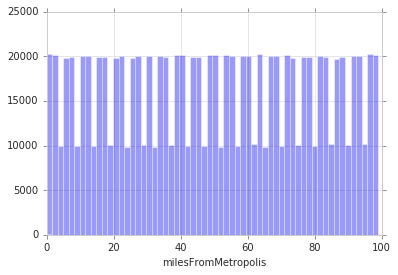

In [240]:
sns.distplot(df_trainFeatures['milesFromMetropolis' ], kde=False, bins = 60)

#### Bivariate Analysis ####

`Target  variable: Salary`

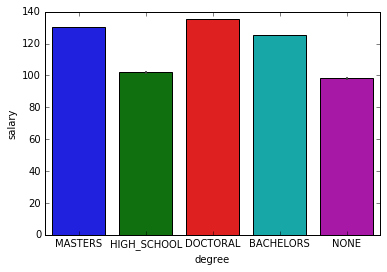

In [159]:
sns.barplot(x='degree',y='salary',data=final_dataset)

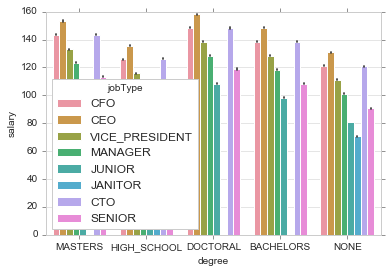

In [10]:
sns.barplot(x='degree',y='salary',hue='jobType',data=final_dataset)

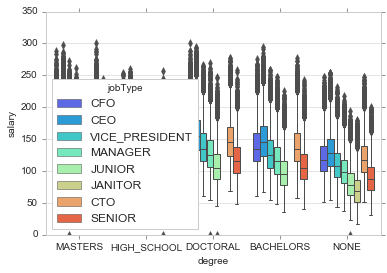

In [12]:
sns.boxplot(x="degree", y="salary", hue='jobType', data=final_dataset,palette='rainbow')

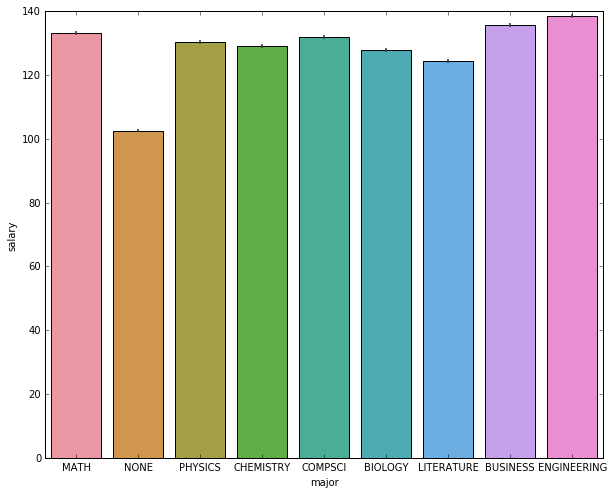

In [161]:
plt.figure(figsize=(10,8))

sns.barplot(x='major',y='salary',data=final_dataset)
plt.show()

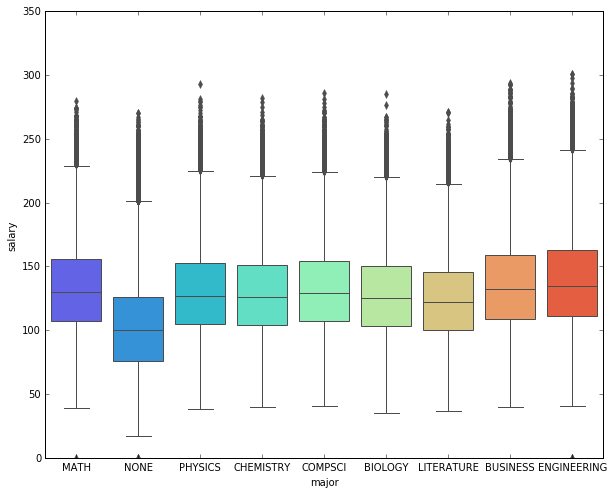

In [165]:
plt.figure(figsize=(10,8))

sns.boxplot(x="major", y="salary", data=final_dataset,palette='rainbow')
plt.show()

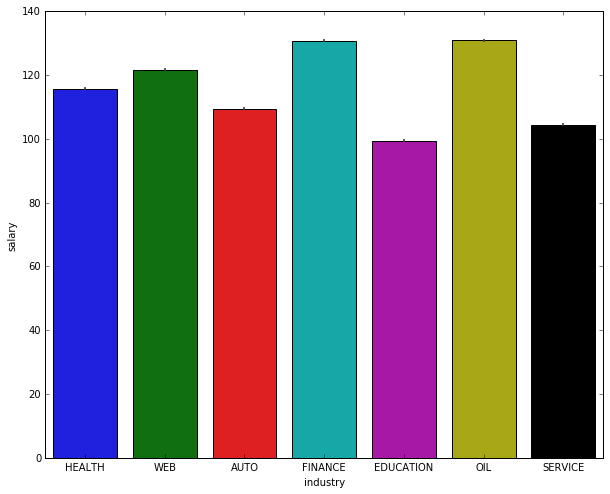

In [162]:
plt.figure(figsize=(10,8))

sns.barplot(x='industry',y='salary',data=final_dataset)
plt.show()

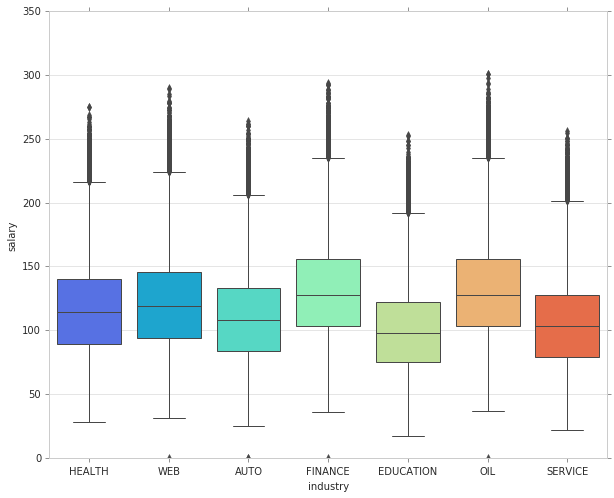

In [167]:
plt.figure(figsize=(10,8))

sns.boxplot(x="industry", y="salary", data=final_dataset,palette='rainbow')
plt.show()

In [176]:
df_trainFeatures.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


Large standard deviation for milesFrom Metropolis v. yearsExperience. This makes sense as the range for yearsExperience is smaller than 

In [15]:
#How many degrees are there?
df_trainFeatures['degree'].nunique() 

5

In [42]:
#What is the most popular degree level in the dataset?
df_trainFeatures['degree'].value_counts().head(1)

HIGH_SCHOOL    236976
Name: degree, dtype: int64

In [43]:
#What is the least popular degree level in the dataset?
df_trainFeatures['degree'].value_counts().tail(1)

MASTERS    175311
Name: degree, dtype: int64

`Years of Experience X Salary`

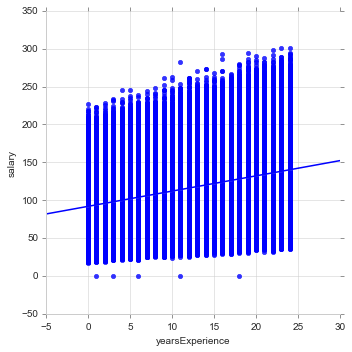

In [9]:
sns.lmplot(x='yearsExperience',y='salary', data=final_dataset)

In [53]:
# 10 Companies which pay the least on average
final_dataset.groupby('companyId').mean().sort_values(['salary'],ascending=False).tail(10)

,salary,yearsExperience,milesFromMetropolis
companyId,,,
COMP30,115.659435,11.930304,49.468425
COMP45,115.649274,12.048454,49.752555
COMP55,115.623708,11.888438,49.419674
COMP31,115.622239,11.944021,49.985212
COMP18,115.597167,11.900420,49.408410
COMP54,115.589785,11.963135,49.633786
COMP42,115.476794,12.026844,49.933455
COMP57,115.393540,11.920243,49.864918
COMP37,115.345049,11.962905,49.367369


In [52]:
# 10 Companies which pay the most on average
final_dataset.groupby('companyId').mean().sort_values(['salary'],ascending=False).head(10)

,salary,yearsExperience,milesFromMetropolis
companyId,,,
COMP40,116.783171,11.983821,49.203961
COMP2,116.759223,12.040087,49.782814
COMP44,116.673602,11.956826,49.193190
COMP13,116.561795,12.101968,49.674417
COMP21,116.539156,11.940498,49.746128
COMP41,116.515543,12.077180,49.658049
COMP9,116.453340,12.001939,49.203277
COMP58,116.446275,12.066600,49.096360
COMP34,116.394813,12.031436,49.371600


### ---- 5 Establish baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data